In [1]:
from sympy import *
from sympy.plotting import (plot, plot_parametric,plot3d_parametric_surface, plot3d_parametric_line,plot3d)

LIST COMPREHENSION, LIMITS, AND CONTINUITY

Recall Method 3 of the Lab 1 Overview: **list comprehension** allows Python to perform multiple computations at once!  This can be very helpful in numerically estimating limits.  Suppose we want to numerically estimate the limit of f(x) = sin(x)/x as x approaches 0.  

As you have already learned in class, we can substitute values of x closer and closer to 0 from the left (such as -0.1, -0.01, -0.001) and from the right (such as 0.1, 0.01, 0.001).  To do this, we will define two lists (using square brackets []) and calculate all of the values in the list at once using list comprehension:

In [3]:
x=symbols('x')
f=sin(x)/x
xleftof0=[-0.1, -0.01, -0.001] # Notice the square brackets and the commas separating the values
yleftof0=[f.subs(x,i) for i in xleftof0]
print('values as x->0 from the left:',yleftof0)

values as x->0 from the left: [0.998334166468282, 0.999983333416666, 0.999999833333342]


Notice the syntax for the line **yleftof0**.  The code literally reads as follows:

"yleftof0 is equal to the list  obtained by substituting x=i in f , where i is every number  in the list xleftof0".

We do the same for the list of values from the right.

In [4]:
xrightof0=[0.1, 0.01, 0.001]
yrightof0=[f.subs(x,i) for i in xrightof0]
print('values as x->0 from the right:',yrightof0)

values as x->0 from the right: [0.998334166468282, 0.999983333416666, 0.999999833333342]


Based on these values, it appears that f(x) is getting close to 1.  We can verify this using Python's **limit** command:

In [5]:
L=limit(f,x,0)
print('The limit of f as x->0 is',L)

The limit of f as x->0 is 1


We also look in this section at continuity, specifically using piecewise functions.  Recall that for a piecewise function, the rule to obtain the output depends on the input.  A practical example of this is a mobile phone plan without unlimited data-your cost will be significantly higher if you go over your data limit for the period.  Recall you can plot multiple graphs in Python; in fact, the graphs can be plotted in different domains on the same axes!  We can determine the continuity of the graphs by computing limits of the appropriate pieces at the appropriate *x*-values.

EXAMPLE: 

1. Define g(x) by the piecewise function:

        (-10x^3+40x^2-40x)/(x-2) if 0<=x<2
        
    g(x) = (-6x^2+30x-36)/(x-3) if 2<=x<3

        6x-24 if 3<=x<4
        
        x^2/100 if x>=4

  a) Sketch the graph on the domain [0,10] to examine the continuity of g.

  b) Find left and right hand limits at 2, 3, and 4 to verify the continuity

Recall multiple graphs can be put in the same plot command using tuples.  As always, we start with the command below which allows us to see the graph in the Jupyter notebook.

In [6]:
matplotlib notebook

<IPython.core.display.Javascript object>


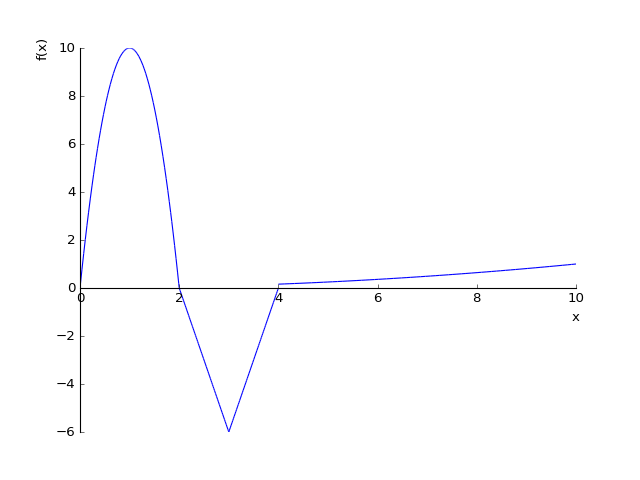

In [7]:
x=symbols('x')
plot(((-10*x**3+40*x**2-40*x)/(x-2),(x,0,2)),((-6*x**2+30*x-36)/(x-3),(x,2,3)),(6*x-24,(x,3,4)),(x**2/100,(x,4,10))) 

At first glance, it may appear that the function is continuous everywhere.  Let's compute the limits to verify.  

**NOTE** We do not have to worry about left or right-hand limits here because those simply tell us which piece to use.  When solving by hand, however, it is important to recognize that, for example, our first limit is the limit of g(x) as x approaches 2 FROM THE LEFT; our second limit is the limit of g(x) as x approaches 2 FROM THE RIGHT, and so on for each value of x we test.  To emphasize this, we will name the variables according to which limit we are taking.

It will also be simpler to define each piece as its own expression.

In [4]:
g1=(-10*x**3+40*x**2-40*x)/(x-2)
g2=(-6*x**2+30*x-36)/(x-3)
lim2left=limit(g1,x,2)
lim2right=limit(g2,x,2) #NOTE that we can also just use the subs command here, since g2 is defined at x=2
gof2=g2.subs(x,2)
print('As x approaches 2, the left limit is',lim2left,'and the right limit is',lim2right)
print('Since g(2)=',gof2,', the function is continuous at x=2.')

As x approaches 2, the left limit is 0 and the right limit is 0
Since g(2)= 0 , the function is continuous at x=2.


In [5]:
g3=6*x-24
lim3left=limit(g2,x,3)
lim3right=limit(g3,x,3)
gof3=g3.subs(x,3)
print('As x approaches 3, the left limit is',lim3left,'and the right limit is',lim3right)
print('Since g(3)=',gof3,', the function is continuous at x=3.')

As x approaches 3, the left limit is -6 and the right limit is -6
Since g(3)= -6 , the function is continuous at x=3.


In [6]:
g4=x**2/100
lim4left=limit(g3,x,4)
lim4right=limit(g4,x,4)
print('As x approaches 4, the left limit is',lim4left,'and the right limit is',lim4right)
print('Since these are not equal, the function is NOT continuous at x=4.')

As x approaches 4, the left limit is 0 and the right limit is 4/25
Since these are not equal, the function is NOT continuous at x=4.


Zooming in on our graph at the point (4,0) we can see why the graph may have appeared continuous at a glance, given the difference in the left and right limits is much smaller than the original range:

<IPython.core.display.Javascript object>


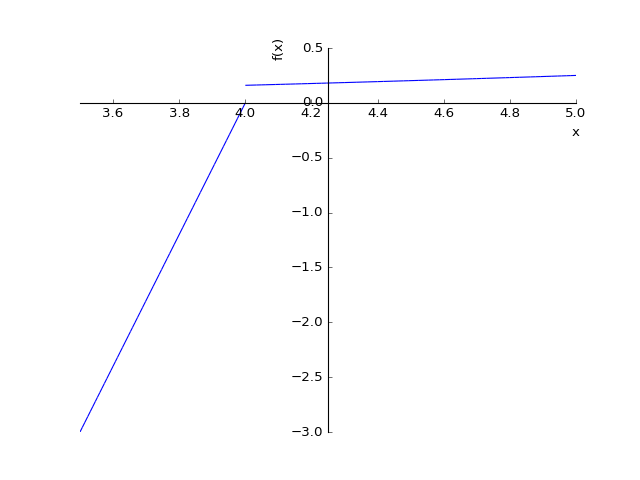

In [7]:
plot((g3,(x,3.5,4)),(g4,(x,4,5)))